# EDA for match data of tennis

In [1]:
# ライブラリインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 設定
pd.options.display.max_columns = 100
pd.options.display.max_rows = 50

%matplotlib inline

In [2]:
# データ読み込み
dir_path = "/Users/Tomoki Yako/tech/competition/SIGNATE/sinnate_tennis/data/"
train_df = pd.read_csv(dir_path + "train.tsv", sep='\t')
test_df = pd.read_csv(dir_path + "test.tsv", sep='\t')

In [3]:
train_df.head()

,id,Tournament,Sex,Year,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,FrenchOpen,men,2013,Jarkko Nieminen,Paul-Henri Mathieu,1,1,3,2,69,84,31,29,11.0,4.0,57.0,42.0,6,7,8.0,13.0,172.0,6,4.0,7.0,4.0,6.0,54,58,46,36,7.0,8.0,60.0,71.0,5,15,24.0,33.0,163.0,4,6.0,6.0,6.0,2.0
1,3,AusOpen,women,2013,Varvara Lepchenko,Simona Halep,2,0,1,2,63,34,37,10,1.0,4.0,23.0,47.0,2,2,9.0,10.0,66.0,6,0.0,1.0,NaN,NaN,58,29,42,16,0.0,3.0,10.0,19.0,6,15,1.0,2.0,90.0,4,6.0,6.0,NaN,NaN
2,4,Wimbledon,women,2013,H.Watson,M.Keys,1,0,0,2,53,18,47,13,4.0,2.0,11.0,15.0,5,2,7.0,4.0,NaN,3,5.0,NaN,NaN,NaN,63,25,37,10,8.0,2.0,23.0,18.0,7,5,8.0,5.0,NaN,6,7.0,NaN,NaN,NaN
3,7,USOpen,women,2013,S Williams,F Schiavone,1,1,2,0,51,13,49,12,1.0,0.0,13.0,8.0,9,6,8.0,6.0,NaN,6,6.0,NaN,NaN,NaN,43,8,57,5,0.0,8.0,3.0,18.0,0,0,6.0,3.0,NaN,0,1.0,NaN,NaN,NaN
4,9,AusOpen,women,2013,Tadeja Majeric,Ajla Tomljanovic,1,0,1,2,72,54,28,10,4.0,7.0,4.0,7.0,3,6,NaN,NaN,99.0,6,6.0,4.0,NaN,NaN,49,36,51,25,5.0,6.0,5.0,6.0,3,6,NaN,NaN,97.0,3,7.0,6.0,NaN,NaN


In [4]:
test_df.head()

,id,Tournament,Sex,Year,Player1,Player2,Round,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,1,Wimbledon,women,2013,A.Radwanska,M.Keys,3,2.0,1.0,71,55,29,18,2.0,1.0,23.0,10.0,18.0,3.0,31.0,20.0,NaN,7.0,4.0,6.0,NaN,NaN,61,53,39,16,15.0,1.0,67.0,51.0,10.0,2.0,34.0,22.0,NaN,5.0,6.0,3.0,NaN,NaN
1,2,AusOpen,men,2013,Nick Kyrgios,Benjamin Becker,1,3.0,1.0,54,60,46,25,34.0,13.0,71.0,52.0,6.0,8.0,5.0,8.0,133.0,6.0,6.0,6.0,7.0,NaN,53,45,47,31,12.0,5.0,38.0,36.0,3.0,7.0,6.0,6.0,114.0,3.0,7.0,2.0,6.0,NaN
2,5,Wimbledon,men,2013,V.Pospisil,M.Youzhny,2,2.0,3.0,63,83,37,25,26.0,2.0,66.0,27.0,7.0,2.0,61.0,39.0,NaN,2.0,7.0,6.0,6.0,4.0,64,76,36,39,8.0,2.0,53.0,20.0,7.0,4.0,46.0,32.0,NaN,6.0,6.0,7.0,3.0,6.0
3,6,FrenchOpen,women,2013,Caroline Wozniacki,Bojana Jovanovski,2,0.0,2.0,70,29,30,10,1.0,3.0,13.0,18.0,2.0,3.0,5.0,7.0,62.0,6.0,3.0,NaN,NaN,NaN,68,34,32,8,3.0,1.0,33.0,32.0,3.0,7.0,2.0,5.0,72.0,7.0,6.0,NaN,NaN,NaN
4,8,Wimbledon,men,2013,N.Djokovic,J.Chardy,3,3.0,0.0,74,40,26,12,8.0,1.0,38.0,3.0,16.0,5.0,21.0,18.0,NaN,6.0,6.0,6.0,NaN,NaN,66,32,34,15,6.0,4.0,18.0,14.0,0.0,0.0,23.0,12.0,NaN,3.0,2.0,2.0,NaN,NaN


In [5]:
train_df.shape

(471, 46)

In [6]:
test_df.shape

(472, 45)

In [7]:
train_df.isnull().sum()

id              0
Tournament      0
Sex             0
Year            0
Player1         0
Player2         0
Round           0
Result          0
FNL.1           0
FNL.2           0
FSP.1           0
FSW.1           0
SSP.1           0
SSW.1           0
ACE.1           9
DBF.1           3
WNR.1          63
UFE.1          63
BPC.1           0
BPW.1           0
NPA.1          45
NPW.1          44
TPW.1         156
ST1.1           0
ST2.1           2
ST3.1         157
ST4.1         342
ST5.1         420
FSP.2           0
FSW.2           0
SSP.2           0
SSW.2           0
ACE.2           9
DBF.2           3
WNR.2          63
UFE.2          63
BPC.2           0
BPW.2           0
NPA.2          45
NPW.2          44
TPW.2         156
ST1.2           0
ST2.2           2
ST3.2         157
ST4.2         342
ST5.2         420
dtype: int64

In [8]:
test_df.isnull().sum()

id              0
Tournament      0
Sex             0
Year            0
Player1         0
Player2         0
Round           0
FNL.1           1
FNL.2           1
FSP.1           0
FSW.1           0
SSP.1           0
SSW.1           0
ACE.1          13
DBF.1           5
WNR.1          63
UFE.1          63
BPC.1           1
BPW.1           1
NPA.1          39
NPW.1          39
TPW.1         156
ST1.1           1
ST2.1           2
ST3.1         164
ST4.1         380
ST5.1         437
FSP.2           0
FSW.2           0
SSP.2           0
SSW.2           0
ACE.2          13
DBF.2           5
WNR.2          63
UFE.2          63
BPC.2           1
BPW.2           1
NPA.2          39
NPW.2          39
TPW.2         156
ST1.2           1
ST2.2           2
ST3.2         164
ST4.2         380
ST5.2         437
dtype: int64

In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 46 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          471 non-null    int64  
 1   Tournament  471 non-null    object 
 2   Sex         471 non-null    object 
 3   Year        471 non-null    int64  
 4   Player1     471 non-null    object 
 5   Player2     471 non-null    object 
 6   Round       471 non-null    int64  
 7   Result      471 non-null    int64  
 8   FNL.1       471 non-null    int64  
 9   FNL.2       471 non-null    int64  
 10  FSP.1       471 non-null    int64  
 11  FSW.1       471 non-null    int64  
 12  SSP.1       471 non-null    int64  
 13  SSW.1       471 non-null    int64  
 14  ACE.1       462 non-null    float64
 15  DBF.1       468 non-null    float64
 16  WNR.1       408 non-null    float64
 17  UFE.1       408 non-null    float64
 18  BPC.1       471 non-null    int64  
 19  BPW.1       471 non-null    i

In [10]:
df = pd.concat([train_df, test_df], ignore_index=True)

In [11]:
# 基礎集計
df.describe()

,id,Year,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
count,943.000000,943.0,943.000000,471.000000,942.000000,942.000000,943.000000,943.000000,943.000000,943.000000,921.000000,935.000000,817.000000,817.000000,942.000000,942.000000,859.000000,860.000000,631.000000,942.000000,939.000000,622.000000,221.000000,86.000000,943.000000,943.000000,943.000000,943.000000,921.000000,935.000000,817.000000,817.000000,942.000000,942.000000,859.000000,860.000000,631.000000,942.000000,939.000000,622.000000,221.000000,86.000000
mean,471.000000,2013.0,1.844115,0.475584,1.490446,1.492569,62.256628,38.785790,37.785790,16.729586,6.140065,3.641711,27.536108,27.281518,5.311040,7.144374,15.541327,17.165116,94.280507,4.801486,4.780618,4.728296,4.787330,4.651163,61.967126,38.688229,38.054083,16.927890,5.982628,3.772193,27.798042,27.676867,5.209130,7.095541,15.942957,17.589535,94.521395,4.816348,4.695421,4.823151,4.710407,5.127907
std,272.364951,0.0,1.254328,0.499934,1.156883,1.173316,7.921985,17.486747,7.917886,8.607756,5.942014,2.648779,16.197736,14.473321,3.988542,5.128567,11.935007,11.650146,36.555619,1.924140,1.909132,1.982647,1.994315,2.085059,8.372687,17.531238,8.383980,8.736354,6.017341,2.748657,15.752516,15.477795,3.830328,5.026963,12.426671,12.870905,36.974755,1.897262,1.948946,1.868696,1.894329,1.839415
min,0.000000,2013.0,1.000000,0.000000,0.000000,0.000000,38.000000,3.000000,14.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,235.500000,2013.0,1.000000,0.000000,0.000000,0.000000,57.000000,26.000000,33.000000,10.000000,2.000000,2.000000,16.000000,17.000000,2.000000,3.000000,7.000000,8.000000,67.000000,3.000000,4.000000,3.000000,3.000000,3.000000,57.000000,25.000000,33.000000,10.000000,1.000000,2.000000,16.000000,16.000000,2.000000,3.000000,8.000000,8.000000,64.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,471.000000,2013.0,1.000000,0.000000,2.000000,2.000000,62.000000,37.000000,38.000000,15.000000,4.000000,3.000000,25.000000,26.000000,5.000000,6.000000,13.000000,14.500000,91.000000,6.000000,6.000000,6.000000,6.000000,5.000000,62.000000,36.000000,38.000000,16.000000,4.000000,3.000000,26.000000,26.000000,5.000000,6.000000,13.000000,15.000000,92.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,706.500000,2013.0,2.000000,1.000000,2.000000,3.000000,67.000000,49.000000,43.000000,22.000000,8.000000,5.000000,36.000000,36.000000,7.000000,10.000000,20.000000,24.000000,116.000000,6.000000,6.000000,6.000000,6.000000,6.000000,67.000000,48.500000,43.500000,22.000000,9.000000,5.000000,37.000000,37.000000,7.000000,10.000000,21.000000,24.000000,119.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,942.000000,2013.0,7.000000,1.000000,3.000000,3.000000,86.000000,109.000000,62.000000,52.000000,41.000000,18.000000,111.000000,89.000000,25.000000,28.000000,96.000000,63.000000,231.000000,7.000000,7.000000,9.000000,7.000000,9.000000,93.000000,132.000000,100.000000,57.000000,39.000000,18.000000,95.000000,96.000000,25.000000,26.000000,82.000000,81.000000,230.000000,7.000000,7.000000,9.000000,7.000000,9.000000


In [12]:
# ヒストグラムと散布図の行列を作成
# from pandas.plotting import scatter_matrix
# x = pd.plotting.scatter_matrix(train_dataset, alpha=1, figsize=(20, 10), diagonal='hist')

In [13]:
df.head()

,id,Tournament,Sex,Year,Player1,Player2,Round,Result,FNL.1,FNL.2,FSP.1,FSW.1,SSP.1,SSW.1,ACE.1,DBF.1,WNR.1,UFE.1,BPC.1,BPW.1,NPA.1,NPW.1,TPW.1,ST1.1,ST2.1,ST3.1,ST4.1,ST5.1,FSP.2,FSW.2,SSP.2,SSW.2,ACE.2,DBF.2,WNR.2,UFE.2,BPC.2,BPW.2,NPA.2,NPW.2,TPW.2,ST1.2,ST2.2,ST3.2,ST4.2,ST5.2
0,0,FrenchOpen,men,2013,Jarkko Nieminen,Paul-Henri Mathieu,1,1.0,3.0,2.0,69,84,31,29,11.0,4.0,57.0,42.0,6.0,7.0,8.0,13.0,172.0,6.0,4.0,7.0,4.0,6.0,54,58,46,36,7.0,8.0,60.0,71.0,5.0,15.0,24.0,33.0,163.0,4.0,6.0,6.0,6.0,2.0
1,3,AusOpen,women,2013,Varvara Lepchenko,Simona Halep,2,0.0,1.0,2.0,63,34,37,10,1.0,4.0,23.0,47.0,2.0,2.0,9.0,10.0,66.0,6.0,0.0,1.0,NaN,NaN,58,29,42,16,0.0,3.0,10.0,19.0,6.0,15.0,1.0,2.0,90.0,4.0,6.0,6.0,NaN,NaN
2,4,Wimbledon,women,2013,H.Watson,M.Keys,1,0.0,0.0,2.0,53,18,47,13,4.0,2.0,11.0,15.0,5.0,2.0,7.0,4.0,NaN,3.0,5.0,NaN,NaN,NaN,63,25,37,10,8.0,2.0,23.0,18.0,7.0,5.0,8.0,5.0,NaN,6.0,7.0,NaN,NaN,NaN
3,7,USOpen,women,2013,S Williams,F Schiavone,1,1.0,2.0,0.0,51,13,49,12,1.0,0.0,13.0,8.0,9.0,6.0,8.0,6.0,NaN,6.0,6.0,NaN,NaN,NaN,43,8,57,5,0.0,8.0,3.0,18.0,0.0,0.0,6.0,3.0,NaN,0.0,1.0,NaN,NaN,NaN
4,9,AusOpen,women,2013,Tadeja Majeric,Ajla Tomljanovic,1,0.0,1.0,2.0,72,54,28,10,4.0,7.0,4.0,7.0,3.0,6.0,NaN,NaN,99.0,6.0,6.0,4.0,NaN,NaN,49,36,51,25,5.0,6.0,5.0,6.0,3.0,6.0,NaN,NaN,97.0,3.0,7.0,6.0,NaN,NaN


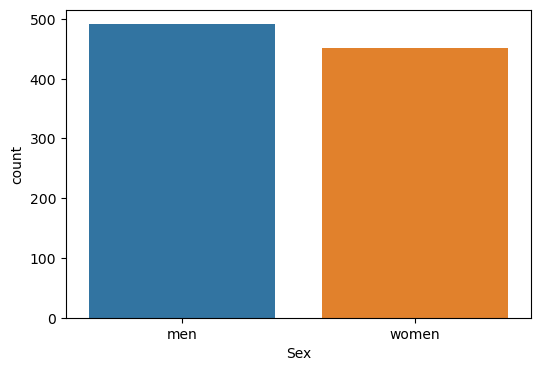

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Sex')
plt.show()

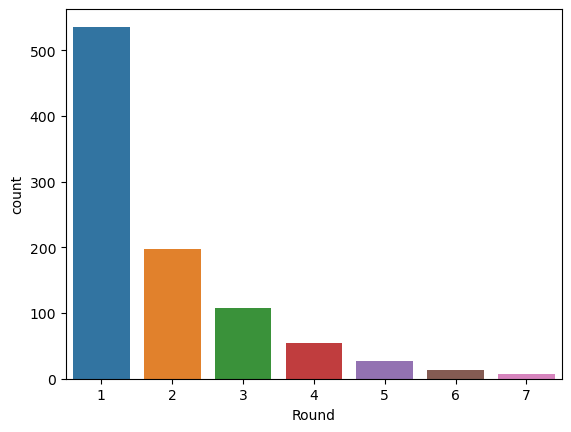

In [15]:
sns.countplot(data=df, x='Round')
plt.show()

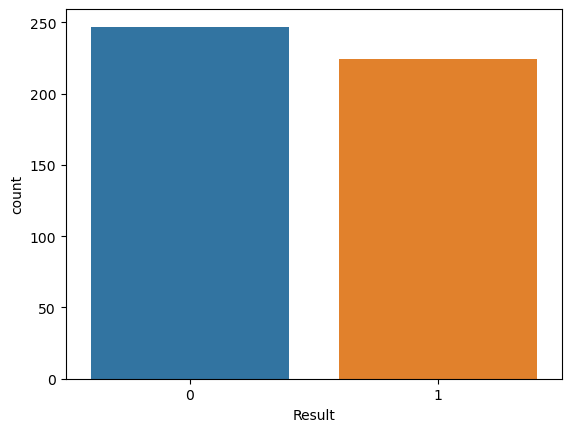

In [16]:
sns.countplot(data=train_df, x='Result')
plt.show()

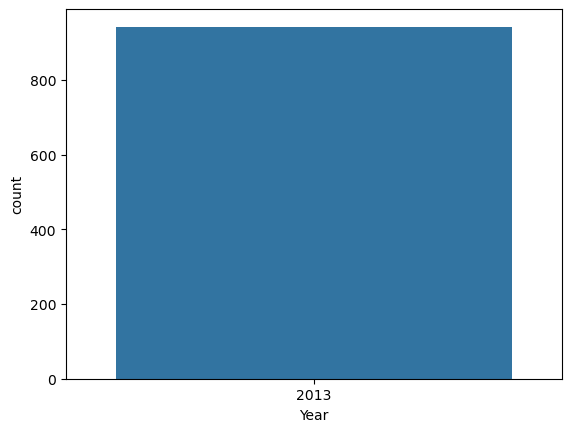

In [17]:
sns.countplot(data=df, x='Year')
plt.show()

In [18]:
# カラムの削除
df2 = df.drop(columns=['Year', 'Player1', 'Player2'])

In [19]:
df2.isnull().sum()

id              0
Tournament      0
Sex             0
Round           0
Result        472
FNL.1           1
FNL.2           1
FSP.1           0
FSW.1           0
SSP.1           0
SSW.1           0
ACE.1          22
DBF.1           8
WNR.1         126
UFE.1         126
BPC.1           1
BPW.1           1
NPA.1          84
NPW.1          83
TPW.1         312
ST1.1           1
ST2.1           4
ST3.1         321
ST4.1         722
ST5.1         857
FSP.2           0
FSW.2           0
SSP.2           0
SSW.2           0
ACE.2          22
DBF.2           8
WNR.2         126
UFE.2         126
BPC.2           1
BPW.2           1
NPA.2          84
NPW.2          83
TPW.2         312
ST1.2           1
ST2.2           4
ST3.2         321
ST4.2         722
ST5.2         857
dtype: int64

In [20]:
print("ACE.1の最小値", df2['ACE.1'].min())
print("ACE.1の最大値", df2['ACE.1'].max())

ACE.1の最小値 0.0
ACE.1の最大値 41.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


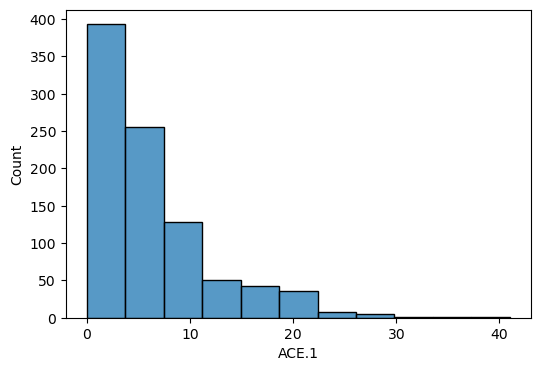

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df2['ACE.1'], kde=False, bins=11)
plt.show()

In [22]:
print("ACE.1の平均値", df2['ACE.1'].mean())
print("ACE.1の中央値", df2['ACE.1'].median())

ACE.1の平均値 6.140065146579804
ACE.1の中央値 4.0


In [23]:
df3 = df2.copy()
ace1_median = df3['ACE.1'].median()
df3['ACE.1'] = df3['ACE.1'].fillna(ace1_median)
print("ACE.1の欠損値の数", df3['ACE.1'].isnull().sum())

ACE.1の欠損値の数 0


In [24]:
print("DBF.1の最小値", df3['DBF.1'].min())
print("DBF.1の最大値", df3['DBF.1'].max())

DBF.1の最小値 0.0
DBF.1の最大値 18.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


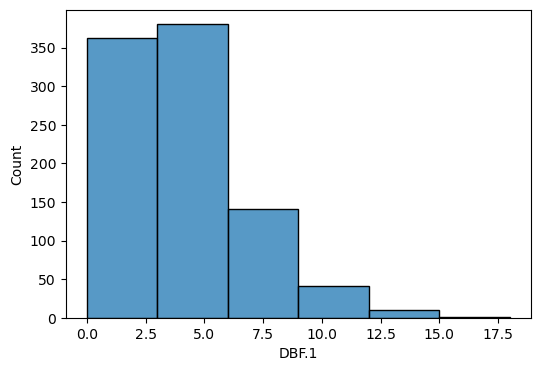

DBF.1の平均値 3.641711229946524
DBF.1の中央値 3.0


In [25]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df3['DBF.1'], kde=False, bins=6)
plt.show()

print("DBF.1の平均値", df3['DBF.1'].mean())
print("DBF.1の中央値", df3['DBF.1'].median())

In [26]:
df4 = df3.copy()
dbf1_median = df4['DBF.1'].median()
df4['DBF.1'] = df4['DBF.1'].fillna(ace1_median)
print("DBF.1の欠損値の数", df4['DBF.1'].isnull().sum())

DBF.1の欠損値の数 0


In [27]:
print("FNL.1の最小値", df4['FNL.1'].min())
print("FNL.1の最大値", df4['FNL.1'].max())

FNL.1の最小値 0.0
FNL.1の最大値 3.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


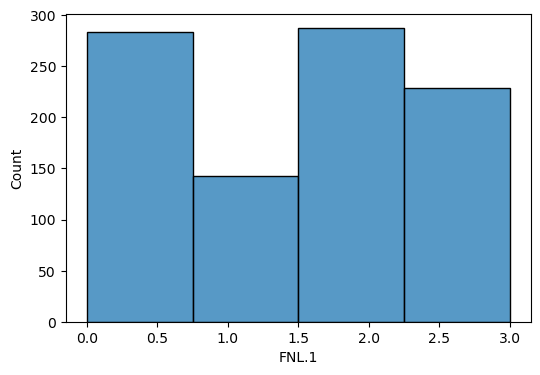

FNL.1の平均値 1.4904458598726114
FNL.1の中央値 2.0


In [28]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df4['FNL.1'], kde=False, bins=4)
plt.show()

print("FNL.1の平均値", df4['FNL.1'].mean())
print("FNL.1の中央値", df4['FNL.1'].median())

In [29]:
df5 = df4.copy()
fnl1_median = df5['FNL.1'].median()
df5['FNL.1'] = df5['FNL.1'].fillna(fnl1_median)
print("FNL.1の欠損値の数", df5['FNL.1'].isnull().sum())

FNL.1の欠損値の数 0


In [30]:
print("FNL.2の最小値", df5['FNL.2'].min())
print("FNL.2の最大値", df5['FNL.2'].max())

FNL.2の最小値 0.0
FNL.2の最大値 3.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


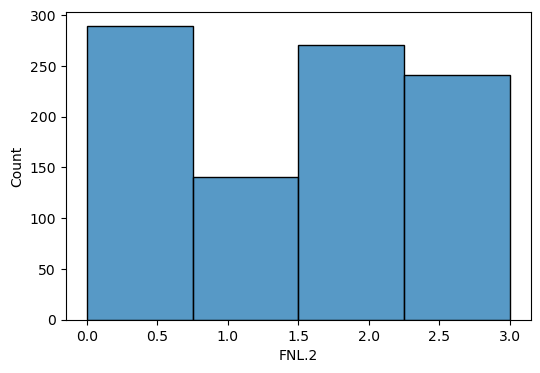

FNL.2の平均値 1.4925690021231421
FNL.2の中央値 2.0


In [31]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df5['FNL.2'], kde=False, bins=4)
plt.show()

print("FNL.2の平均値", df5['FNL.2'].mean())
print("FNL.2の中央値", df5['FNL.2'].median())

In [32]:
df6 = df5.copy()
fnl2_median = df6['FNL.2'].median()
df6['FNL.2'] = df6['FNL.2'].fillna(fnl2_median)
print("FNL.2の欠損値の数", df6['FNL.2'].isnull().sum())

FNL.2の欠損値の数 0


In [33]:
df6.isnull().sum()

id              0
Tournament      0
Sex             0
Round           0
Result        472
FNL.1           0
FNL.2           0
FSP.1           0
FSW.1           0
SSP.1           0
SSW.1           0
ACE.1           0
DBF.1           0
WNR.1         126
UFE.1         126
BPC.1           1
BPW.1           1
NPA.1          84
NPW.1          83
TPW.1         312
ST1.1           1
ST2.1           4
ST3.1         321
ST4.1         722
ST5.1         857
FSP.2           0
FSW.2           0
SSP.2           0
SSW.2           0
ACE.2          22
DBF.2           8
WNR.2         126
UFE.2         126
BPC.2           1
BPW.2           1
NPA.2          84
NPW.2          83
TPW.2         312
ST1.2           1
ST2.2           4
ST3.2         321
ST4.2         722
ST5.2         857
dtype: int64

In [34]:
df7 = df6.drop(columns=['WNR.1', 'UFE.1', 'TPW.1', 'ST3.1', 'ST4.1', 'ST5.1', 'WNR.2', 'UFE.2', 'TPW.2', 'ST3.2', 'ST4.2', 'ST5.2'])
df7.isnull().sum()

id              0
Tournament      0
Sex             0
Round           0
Result        472
FNL.1           0
FNL.2           0
FSP.1           0
FSW.1           0
SSP.1           0
SSW.1           0
ACE.1           0
DBF.1           0
BPC.1           1
BPW.1           1
NPA.1          84
NPW.1          83
ST1.1           1
ST2.1           4
FSP.2           0
FSW.2           0
SSP.2           0
SSW.2           0
ACE.2          22
DBF.2           8
BPC.2           1
BPW.2           1
NPA.2          84
NPW.2          83
ST1.2           1
ST2.2           4
dtype: int64

In [35]:
print("BPC.1の最小値", df7['BPC.1'].min())
print("BPC.1の最大値", df7['BPC.1'].max())

BPC.1の最小値 0.0
BPC.1の最大値 25.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


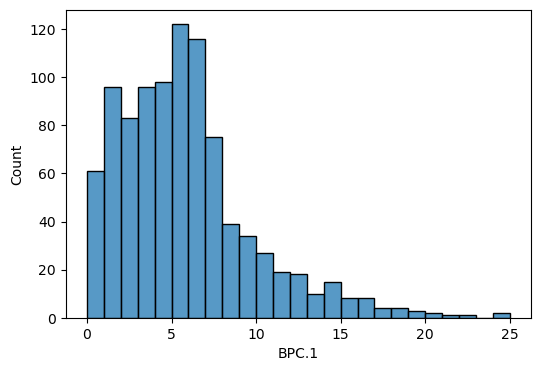

BPC.1の平均値 5.31104033970276
BPC.1の中央値 5.0


In [36]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df7['BPC.1'], kde=False, bins=25)
plt.show()

print("BPC.1の平均値", df7['BPC.1'].mean())
print("BPC.1の中央値", df7['BPC.1'].median())

In [37]:
df8 = df7.copy()
bpc1_median = df8['BPC.1'].median()
df8['BPC.1'] = df8['BPC.1'].fillna(bpc1_median)
print("BPC.1の欠損値の数", df8['BPC.1'].isnull().sum())

BPC.1の欠損値の数 0


In [38]:
print("BPW.1の最小値", df8['BPW.1'].min())
print("BPW.1の最大値", df8['BPW.1'].max())

BPW.1の最小値 0.0
BPW.1の最大値 28.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


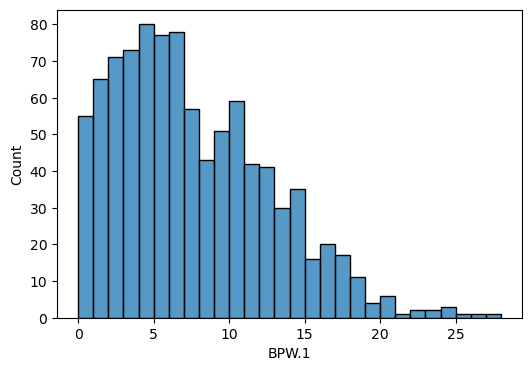

BPW.1の平均値 7.144373673036093
BPW.1の中央値 6.0


In [39]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df8['BPW.1'], kde=False, bins=28)
plt.show()

print("BPW.1の平均値", df8['BPW.1'].mean())
print("BPW.1の中央値", df8['BPW.1'].median())

In [40]:
df9 = df8.copy()
bpw1_median = df9['BPW.1'].median()
df9['BPW.1'] = df9['BPW.1'].fillna(bpw1_median)
print("BPW.1の欠損値の数", df9['BPW.1'].isnull().sum())

BPW.1の欠損値の数 0


In [41]:
print("NPA.1の最小値", df9['NPA.1'].min())
print("NPA.1の最大値", df9['NPA.1'].max())

NPA.1の最小値 0.0
NPA.1の最大値 96.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


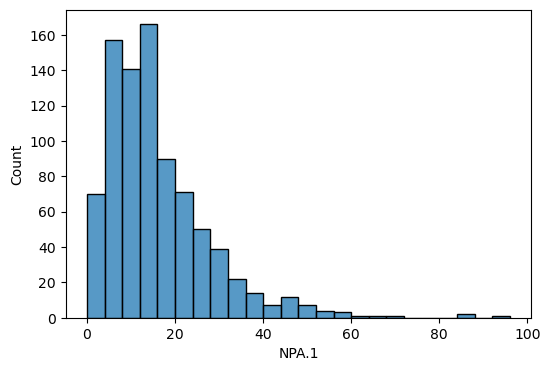

NPA.1の平均値 15.541327124563447
NPA.1の中央値 13.0


In [42]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df9['NPA.1'], kde=False, bins=24)
plt.show()

print("NPA.1の平均値", df9['NPA.1'].mean())
print("NPA.1の中央値", df9['NPA.1'].median())

In [43]:
df10 = df9.copy()
npa1_median = df10['NPA.1'].median()
df10['NPA.1'] = df10['NPA.1'].fillna(npa1_median)
print("NPA.1の欠損値の数", df10['NPA.1'].isnull().sum())

NPA.1の欠損値の数 0


In [44]:
print("NPW.1の最小値", df10['NPW.1'].min())
print("NPW.1の最大値", df10['NPW.1'].max())

NPW.1の最小値 0.0
NPW.1の最大値 63.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


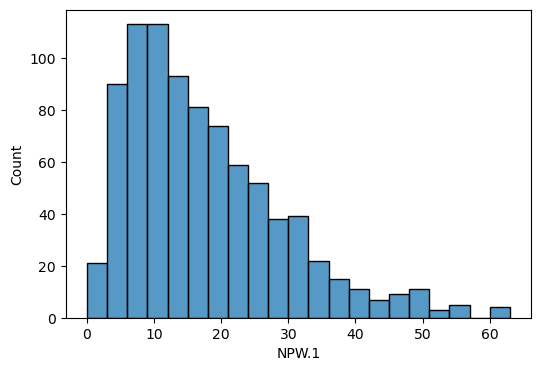

NPW.1の平均値 17.165116279069768
NPW.1の中央値 14.5


In [45]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df10['NPW.1'], kde=False, bins=21)
plt.show()

print("NPW.1の平均値", df10['NPW.1'].mean())
print("NPW.1の中央値", df10['NPW.1'].median())

In [46]:
df11 = df10.copy()
NPW1_median = df11['NPW.1'].median()
df11['NPW.1'] = df11['NPW.1'].fillna(NPW1_median)
print("NPW.1の欠損値の数", df11['NPW.1'].isnull().sum())

NPW.1の欠損値の数 0


In [47]:
print("ST1.1の最小値", df11['ST1.1'].min())
print("ST1.1の最大値", df11['ST1.1'].max())

ST1.1の最小値 0.0
ST1.1の最大値 7.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


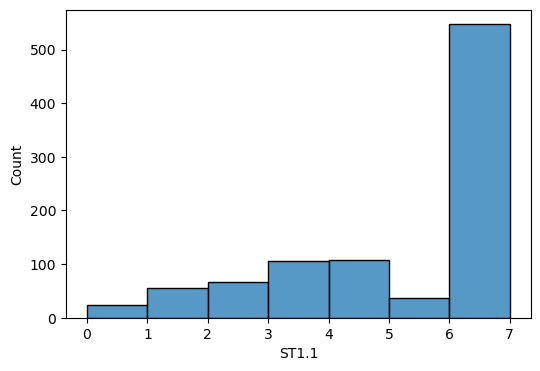

ST1.1の平均値 4.801486199575372
ST1.1の中央値 6.0


In [48]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df11['ST1.1'], kde=False, bins=7)
plt.show()

print("ST1.1の平均値", df11['ST1.1'].mean())
print("ST1.1の中央値", df11['ST1.1'].median())

In [49]:
df12 = df11.copy()
ST11_median = df12['ST1.1'].median()
df12['ST1.1'] = df12['ST1.1'].fillna(ST11_median)
print("ST1.1の欠損値の数", df12['ST1.1'].isnull().sum())

ST1.1の欠損値の数 0


In [50]:
print("ST2.1の最小値", df12['ST2.1'].min())
print("ST2.1の最大値", df12['ST2.1'].max())

ST2.1の最小値 0.0
ST2.1の最大値 7.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


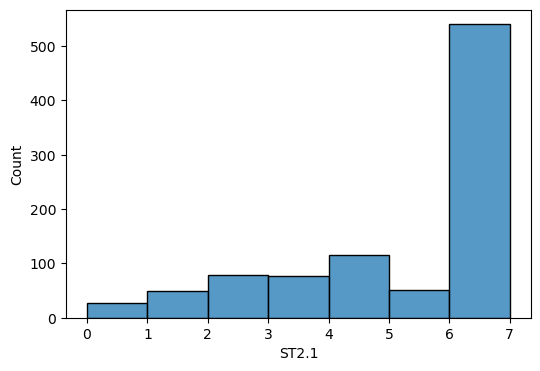

ST2.1の平均値 4.780617678381256
ST2.1の中央値 6.0


In [51]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df12['ST2.1'], kde=False, bins=7)
plt.show()

print("ST2.1の平均値", df12['ST2.1'].mean())
print("ST2.1の中央値", df12['ST2.1'].median())

In [52]:
df13 = df12.copy()
ST21_median = df13['ST2.1'].median()
df13['ST2.1'] = df13['ST2.1'].fillna(ST21_median)
print("ST2.1の欠損値の数", df13['ST2.1'].isnull().sum())

ST2.1の欠損値の数 0


In [53]:
print("ACE.2の最小値", df13['ACE.2'].min())
print("ACE.2の最大値", df13['ACE.2'].max())

ACE.2の最小値 0.0
ACE.2の最大値 39.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


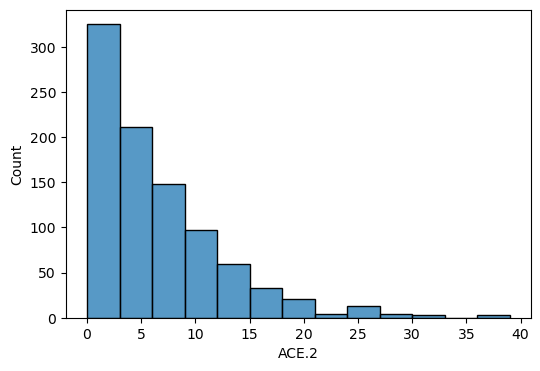

ACE.2の平均値 5.982627578718784
ACE.2の中央値 4.0


In [54]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df13['ACE.2'], kde=False, bins=13)
plt.show()

print("ACE.2の平均値", df13['ACE.2'].mean())
print("ACE.2の中央値", df13['ACE.2'].median())

In [55]:
df14 = df13.copy()
ACE2_median = df14['ACE.2'].median()
df14['ACE.2'] = df14['ACE.2'].fillna(ACE2_median)
print("ACE.2の欠損値の数", df14['ACE.2'].isnull().sum())

ACE.2の欠損値の数 0


In [56]:
print("DBF.2の最小値", df14['DBF.2'].min())
print("DBF.2の最大値", df14['DBF.2'].max())

DBF.2の最小値 0.0
DBF.2の最大値 18.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


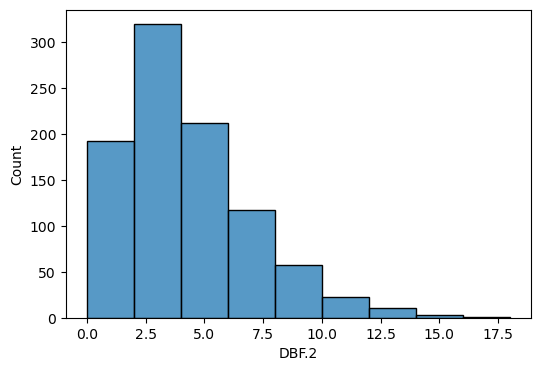

DBF.2の平均値 3.7721925133689838
DBF.2の中央値 3.0


In [57]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df14['DBF.2'], kde=False, bins=9)
plt.show()

print("DBF.2の平均値", df14['DBF.2'].mean())
print("DBF.2の中央値", df14['DBF.2'].median())

In [58]:
df15 = df14.copy()
DBF2_median = df15['DBF.2'].median()
df15['DBF.2'] = df15['DBF.2'].fillna(DBF2_median)
print("DBF.2の欠損値の数", df15['DBF.2'].isnull().sum())

DBF.2の欠損値の数 0


In [59]:
print("BPC.2の最小値", df15['BPC.2'].min())
print("BPC.2の最大値", df15['BPC.2'].max())

BPC.2の最小値 0.0
BPC.2の最大値 25.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


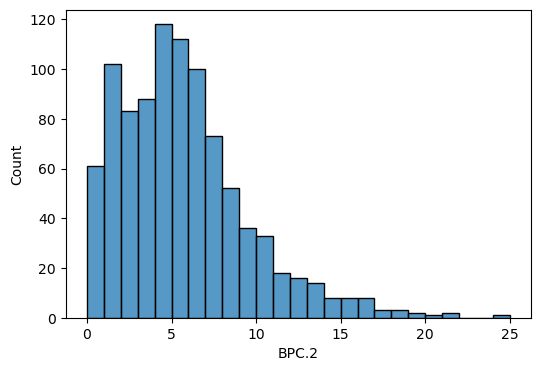

BPC.2の平均値 5.209129511677283
BPC.2の中央値 5.0


In [60]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df15['BPC.2'], kde=False, bins=25)
plt.show()

print("BPC.2の平均値", df15['BPC.2'].mean())
print("BPC.2の中央値", df15['BPC.2'].median())

In [61]:
df16 = df15.copy()
BPC2_median = df16['BPC.2'].median()
df16['BPC.2'] = df16['BPC.2'].fillna(BPC2_median)
print("BPC.2の欠損値の数", df16['BPC.2'].isnull().sum())

BPC.2の欠損値の数 0


In [62]:
print("BPW.2の最小値", df16['BPW.2'].min())
print("BPW.2の最大値", df16['BPW.2'].max())

BPW.2の最小値 0.0
BPW.2の最大値 26.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


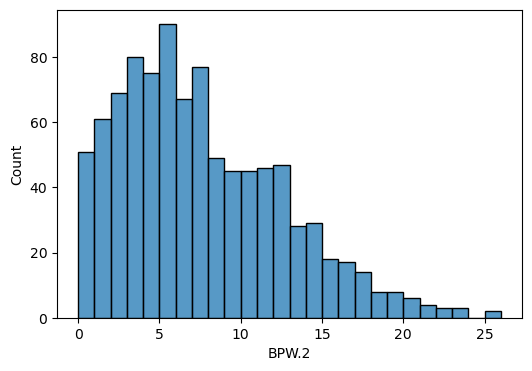

BPW.2の平均値 7.095541401273885
BPW.2の中央値 6.0


In [63]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df16['BPW.2'], kde=False, bins=26)
plt.show()

print("BPW.2の平均値", df16['BPW.2'].mean())
print("BPW.2の中央値", df16['BPW.2'].median())

In [64]:
df17 = df16.copy()
BPW2_median = df17['BPW.2'].median()
df17['BPW.2'] = df17['BPW.2'].fillna(BPW2_median)
print("BPW.2の欠損値の数", df17['BPW.2'].isnull().sum())

BPW.2の欠損値の数 0


In [66]:
print("NPA.2の最小値", df17['NPA.2'].min())
print("NPA.2の最大値", df17['NPA.2'].max())

NPA.2の最小値 0.0
NPA.2の最大値 82.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


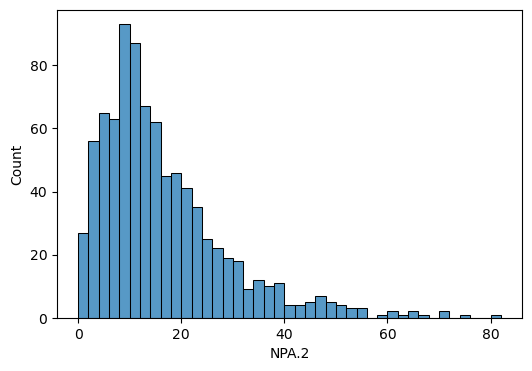

NPA.2の平均値 15.942956926658905
NPA.2の中央値 13.0


In [67]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df17['NPA.2'], kde=False, bins=41)
plt.show()

print("NPA.2の平均値", df17['NPA.2'].mean())
print("NPA.2の中央値", df17['NPA.2'].median())


In [68]:
df18 = df17.copy()
NPA2_median = df18['NPA.2'].median()
df18['NPA.2'] = df18['NPA.2'].fillna(NPA2_median)
print("NPA.2の欠損値の数", df18['NPA.2'].isnull().sum())

NPA.2の欠損値の数 0


In [69]:
print("NPW.2の最小値", df18['NPW.2'].min())
print("NPW.2の最大値", df18['NPW.2'].max())

NPW.2の最小値 0.0
NPW.2の最大値 81.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


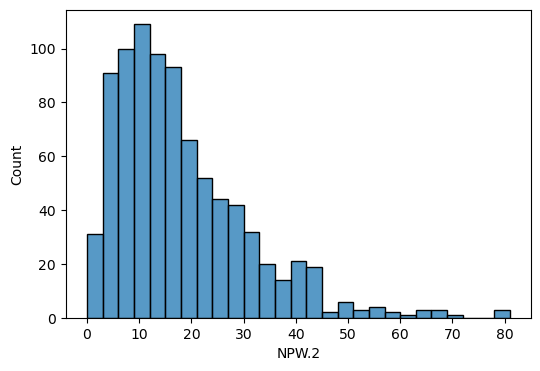

NPW.2の平均値 17.58953488372093
NPW.2の中央値 15.0


In [70]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df18['NPW.2'], kde=False, bins=27)
plt.show()

print("NPW.2の平均値", df18['NPW.2'].mean())
print("NPW.2の中央値", df18['NPW.2'].median())


In [71]:
df19 = df18.copy()
NPW2_median = df19['NPW.2'].median()
df19['NPW.2'] = df19['NPW.2'].fillna(NPW2_median)
print("NPW.2の欠損値の数", df19['NPW.2'].isnull().sum())

NPW.2の欠損値の数 0


In [72]:
print("ST1.2の最小値", df19['ST1.2'].min())
print("ST1.2の最大値", df19['ST1.2'].max())

ST1.2の最小値 0.0
ST1.2の最大値 7.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


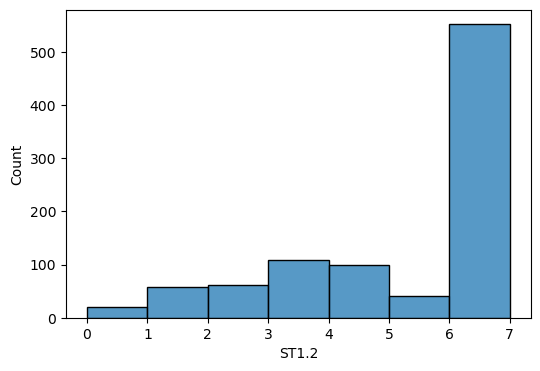

ST1.2の平均値 4.816348195329087
ST1.2の中央値 6.0


In [73]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df19['ST1.2'], kde=False, bins=7)
plt.show()

print("ST1.2の平均値", df19['ST1.2'].mean())
print("ST1.2の中央値", df19['ST1.2'].median())

In [74]:
df20 = df19.copy()
ST12_median = df20['ST1.2'].median()
df20['ST1.2'] = df20['ST1.2'].fillna(ST12_median)
print("ST1.2の欠損値の数", df20['ST1.2'].isnull().sum())

ST1.2の欠損値の数 0


In [75]:
print("ST2.2の最小値", df20['ST2.2'].min())
print("ST2.2の最大値", df20['ST2.2'].max())

ST2.2の最小値 0.0
ST2.2の最大値 7.0


c:\Users\Public\Anaconda\envs\kaggle\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


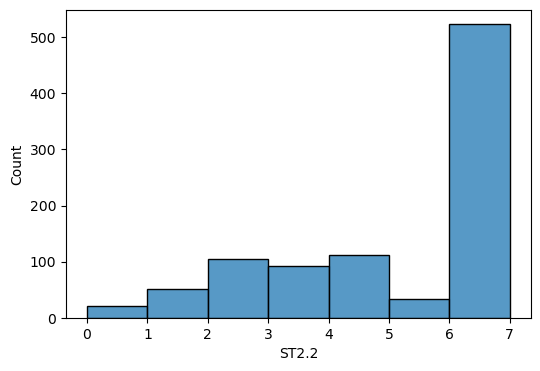

ST2.2の平均値 4.69542066027689
ST2.2の中央値 6.0


In [76]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df20['ST2.2'], kde=False, bins=7)
plt.show()

print("ST2.2の平均値", df20['ST2.2'].mean())
print("ST2.2の中央値", df20['ST2.2'].median())

In [77]:
df21 = df20.copy()
ST22_median = df21['ST2.2'].median()
df21['ST2.2'] = df21['ST2.2'].fillna(ST22_median)
print("ST2.2の欠損値の数", df21['ST2.2'].isnull().sum())

ST2.2の欠損値の数 0


In [78]:
df21.isnull().sum()

id              0
Tournament      0
Sex             0
Round           0
Result        472
FNL.1           0
FNL.2           0
FSP.1           0
FSW.1           0
SSP.1           0
SSW.1           0
ACE.1           0
DBF.1           0
BPC.1           0
BPW.1           0
NPA.1           0
NPW.1           0
ST1.1           0
ST2.1           0
FSP.2           0
FSW.2           0
SSP.2           0
SSW.2           0
ACE.2           0
DBF.2           0
BPC.2           0
BPW.2           0
NPA.2           0
NPW.2           0
ST1.2           0
ST2.2           0
dtype: int64